In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_processed = pd.read_csv("processed_dataset.csv")

X = df_processed.drop(columns=['num'])
y = df_processed['num']

In [ ]:
# Feature Importance (Random Forest)

thalach      0.117972
oldpeak      0.098251
chol         0.093967
age          0.088777
trestbps     0.082947
ca_0.0       0.055251
thal_7.0     0.048777
thal_3.0     0.048541
cp_4         0.044529
exang_1      0.030600
exang_0      0.029875
ca_1.0       0.024115
slope_2      0.023727
slope_1      0.023677
restecg_0    0.022211
ca_2.0       0.020896
restecg_2    0.019407
sex_0        0.017579
sex_1        0.017430
cp_3         0.017298
fbs_0        0.013689
ca_3.0       0.013371
fbs_1        0.012140
thal_6.0     0.009050
cp_1         0.008791
slope_3      0.007988
cp_2         0.007959
restecg_1    0.001185
dtype: float64


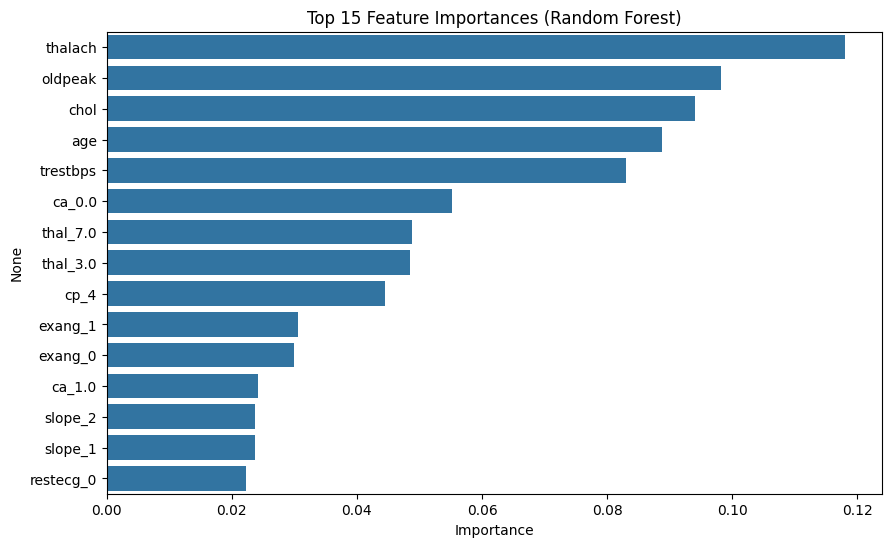

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importances)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Recursive Feature Elimination (RFE)

In [7]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]
print("Features selected by RFE:", list(selected_rfe))

Features selected by RFE: ['cp_4', 'fbs_1', 'restecg_0', 'exang_1', 'slope_1', 'ca_0.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


In [ ]:
# Chi-Square Test

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_scaled, y)

selected_chi2 = X.columns[chi_selector.get_support()]
print("Features selected by Chi-Square:", list(selected_chi2))

Features selected by Chi-Square: ['cp_3', 'cp_4', 'exang_1', 'slope_1', 'slope_2', 'ca_0.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_7.0']


In [ ]:
# Final Feature Selection & Reduced Dataset

In [9]:
# Union of top RF features + RFE + Chi-Square
final_features = list(set(feat_importances.index[:10]) | set(selected_rfe) | set(selected_chi2))
print("Final Selected Features:", final_features)

# Reduced dataset
X_selected = df_processed[final_features + ['num']]
X_selected.to_csv("reduced_dataset.csv", index=False)

print("Reduced dataset shape:", X_selected.shape) 

Final Selected Features: ['slope_1', 'exang_1', 'age', 'trestbps', 'thal_6.0', 'ca_3.0', 'oldpeak', 'restecg_0', 'ca_0.0', 'cp_3', 'thalach', 'thal_3.0', 'chol', 'thal_7.0', 'fbs_1', 'cp_4', 'slope_2', 'ca_2.0']
Reduced dataset shape: (303, 19)
